## Take OTU table, QC, generate preliminary figures
#### Last updated 06-25-2018 Sarah K. Hu

In [22]:
#Load required libraries
library(reshape2)
library(ggplot2)
library(vegan)
library(plyr)

In [2]:
#Import OTU table
count<-read.table('V4_OTUtable_test.txt', sep="\t",header=TRUE, skip=1, comment.char = "")
# quick view:
colnames(count)[1]<-"OTU.ID"
head(count) #make sure samples are column names and OTU.IDs (from PR2) are row names
dim(count) #V4_OTUtable_test.txt should be 6138 rows and 7 columns


OTU.ID,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,taxonomy
AB353770.1.1740_U,1,0,0,0,0,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Peridiniopsis; Peridiniopsis+kevei
KF130109.1.1755_U,0,5,2,79,2,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
AB284159.1.1765_U,0,8,4,67,16,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
AY256316.1.1219_U,0,0,1,2,4,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.
AM235536.1.1627_U,0,0,0,0,0,Eukaryota; Archaeplastida; Streptophyta; Embryophyceae; Embryophyceae_X; Embryophyceae_XX; Uromyrtus; Uromyrtus+metrosideros
EU087259.1.908_U,15,0,64,6,319,Eukaryota; Rhizaria; Cercozoa; Filosa-Thecofilosea; Ebriida; TAGIRI1-lineage; TAGIRI1-lineage_X; TAGIRI1-lineage_X+sp.


[1] 6138    7

In [3]:
##Get quick stats of OTU results
length(count$OTU.ID) #Total number of OTUs generated
colsum<-apply(count[2:6],2,sum) #Colums 2:5 are my sample colums
colsum #number of sequences per sample

[1] 6138

Sample_1 Sample_2 Sample_3 Sample_4 Sample_5 
  377016    75021    99619   395592   349361

In [4]:
##Filter out OTUs with only 1 sequence in the whole dataset (global singletons)
rowsum<-apply(count[2:6],1,sum) #remove global singletons.
count.no1 = count[ rowsum>1, ]  #count.no1 = OTU table without global singletons
dim(count)[1] - dim(count.no1)[1] #Outputs the number of OTUs (total) lost in this step

[1] 2633

## Barplot distribution of OTU size per sample

In [5]:
#Isolate only count colums
counts_only<-count.no1[2:6]
seq_total<-apply(counts_only,2,sum) #number of sequences per sample
OTU_count<-colSums(counts_only>0) #total number of OTUs
OTU_single<-colSums(counts_only==1) #Number of singleton OTUs
OTU_double<-colSums(counts_only==2) #Number of doubleton OTUs
OTU_else<-colSums(counts_only>2) #Number of OTUs with more than 2 sequences

sample_info<-data.frame(seq_total,OTU_count,OTU_single,OTU_double,OTU_else)# Compile
head(sample_info) #dataframe with OTU stats per sample
# write.csv(sample_info, file="OTUstats.csv") #Option to write out to table

,seq_total,OTU_count,OTU_single,OTU_double,OTU_else
Sample_1,376657,2429,282,330,1817
Sample_2,74972,1177,322,164,691
Sample_3,99530,1497,367,217,913
Sample_4,395353,1925,311,275,1339
Sample_5,349093,2202,377,312,1513


In [6]:
#Plot it
sample_info$samples<-row.names(sample_info)
allM<-melt(sample_info) #Melt to long format
allM$Figure<-"Sequences"
allM$Figure[allM$variable == "OTU_count"]<-"Total OTUs"
otudist<-c("OTU_single", "OTU_double", "OTU_else")
allM$Figure[allM$variable %in% otudist]<-"Breakdown of OTUs"
#head(allM)


Using samples as id variables


In [7]:
#Basic bar plot
bar_stats<- ggplot(allM, aes(x=samples, y=value, fill=variable))+geom_bar(stat="identity",position="stack",color="black")+theme_bw()+theme(axis.text.x = element_text(angle = 90,hjust=1,vjust=0.5,size=8),axis.text.y=element_text(size=12),legend.position = "top")

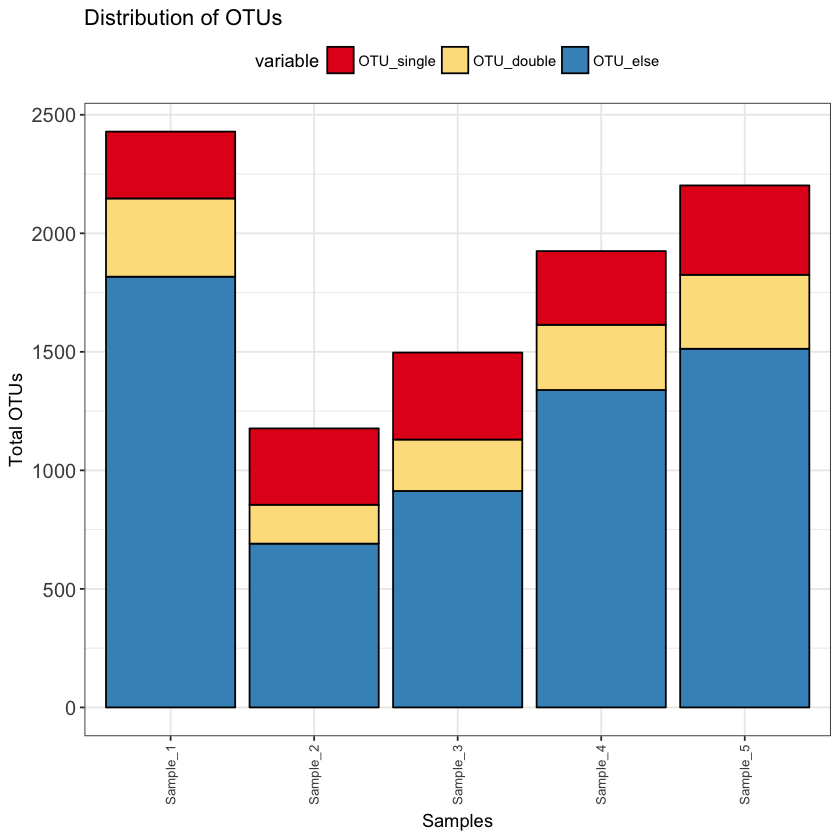

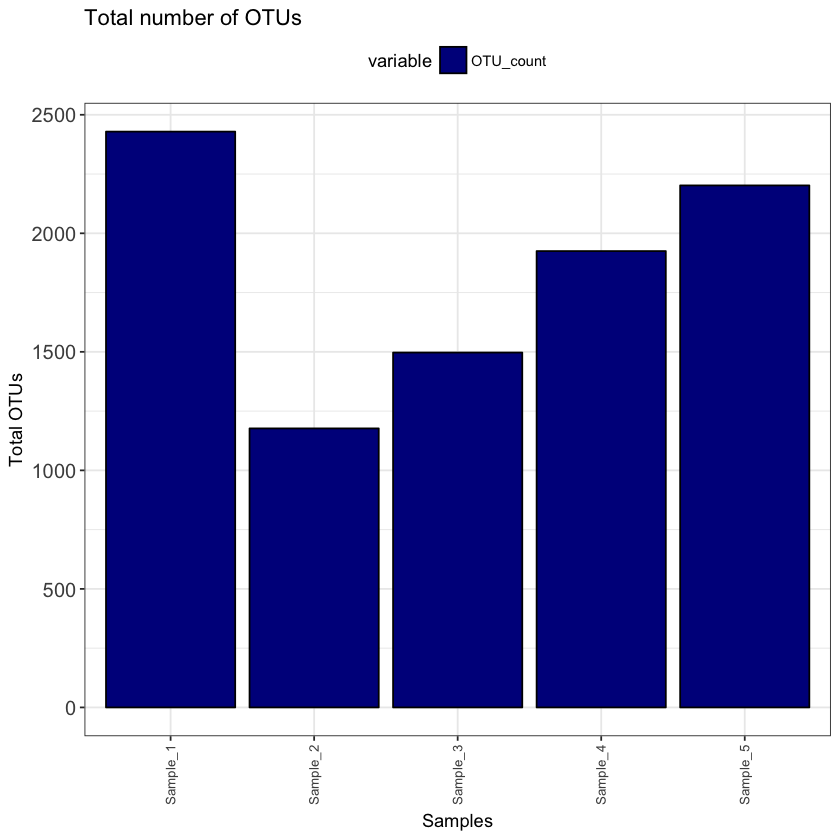

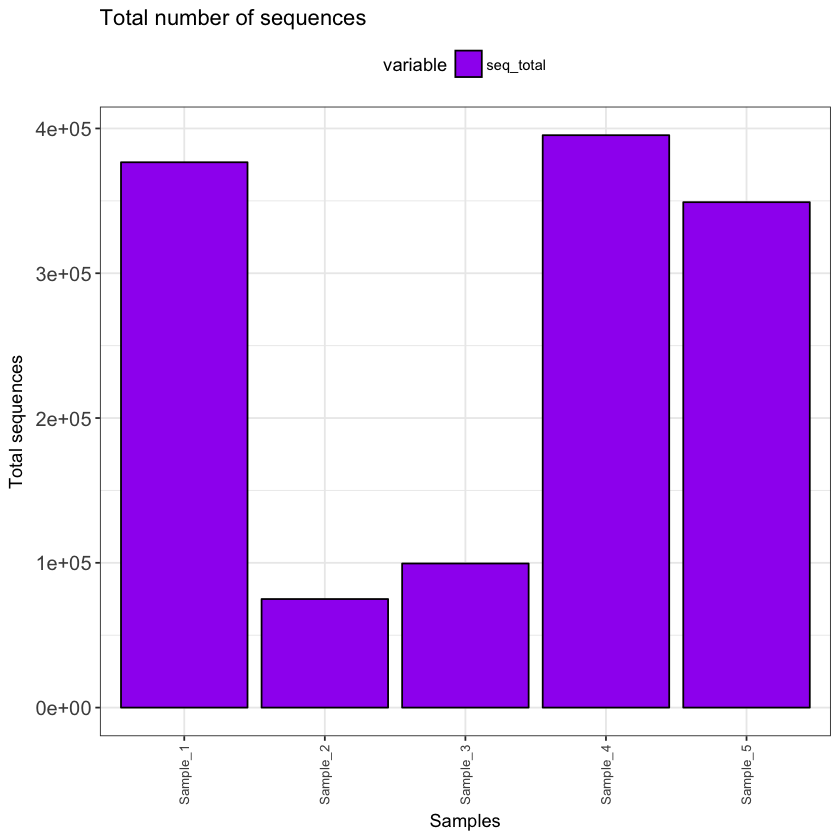

In [8]:
bar_stats %+% subset(allM, Figure %in% "Breakdown of OTUs")+labs(title="Distribution of OTUs",x="Samples", y="Total OTUs")+scale_fill_manual(values=c("#e41a1c","#fee08b","#4393c3"))
bar_stats %+% subset(allM, Figure %in% "Total OTUs")+labs(title="Total number of OTUs",x="Samples", y="Total OTUs")+scale_fill_manual(values=c("darkblue"))
bar_stats %+% subset(allM, Figure %in% "Sequences")+labs(title="Total number of sequences",x="Samples", y="Total sequences")+scale_fill_manual(values=c("purple"))

In [ ]:
#save(counts_only, count.no1, allM, file="Checkpoint1_PrelimFigs.RData") #Optional save R objects
#load("Checkpoint1_PrelimFigs.RData",verbose=T) #Option to load R objects from previous

# Option to remove unwanted samples

In [33]:
#Based on the total number of sequences in each sample.
count.no1$Sample_2<-NULL
head(count.no1[1:3,])

,OTU.ID,Sample_1,Sample_3,Sample_4,Sample_5,taxonomy
KF130109.1.1755_U,KF130109.1.1755_U,0,2,79,2,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
AB284159.1.1765_U,AB284159.1.1765_U,0,4,67,16,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
AY256316.1.1219_U,AY256316.1.1219_U,0,1,2,4,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.


# Option to randomly subsample OTU table
## For this tutorial we will first perform a random subsampling normalization. After, each sample in our data will have the same number of sequences

#### Please see notes on normalization in the README.md!

In [34]:
# Randomly subsample data
#Assign row names as OTU IDs
row.names(count.no1)<-count.no1$OTU.ID
#Isolate only columns with data
keep<-count.no1[2:5];head(keep)
sub<-min(colSums(keep)); sub #sub =total number of sequences that is fewest among all samples

#Requires vegan library
rare <- rrarefy(t(keep), sub) #Randomly subsamples data so that all sample have the same number of sequences
subsampled<-as.data.frame(t(rare))
colSums(subsampled) #all should be equal to sub (in test data, n=99,530)

,Sample_1,Sample_3,Sample_4,Sample_5
KF130109.1.1755_U,0,2,79,2
AB284159.1.1765_U,0,4,67,16
AY256316.1.1219_U,0,1,2,4
EU087259.1.908_U,15,64,6,319
EF173005.1.1679_U,18,7,0,22
GU820024.1.1392_U,3,0,0,3


[1] 99530

Sample_1 Sample_3 Sample_4 Sample_5 
   99530    99530    99530    99530

In [ ]:
# Perform centered log-ratio normalization:
# library(compositions)
# df_clr<-as.data.frame(clr(keep))
## Also look into DESeq for additional options for normalization

## Basic diversity estimates

In [25]:
#Calculate alpha diversity

#diversity measurement that accounts for both abundance and evenness of the species present (both evenness and richness). proportion of species relative to the total multiplied by the ln of the proportion
shannon<-diversity(subsampled,index="shannon",2)
#evennes in the community
invsimp<-diversity(subsampled,index="invsimpson",2)

OTU_count<-colSums(subsampled>0) #to evaluate species richness
alpha<-data.frame(shannon,invsimp,OTU_count) #combine measurements
head(alpha)

ERROR: Error in diversity(subsampled, index = "shannon", 2): input data must be non-negative


In [26]:
alpha$samples<-row.names(alpha)
alpha.m<-melt(alpha)
head(alpha.m)

Using samples as id variables


samples,variable,value
Sample_1,shannon,5.195352
Sample_2,shannon,4.506631
Sample_3,shannon,4.182208
Sample_4,shannon,4.733126
Sample_1,invsimp,46.115529
Sample_2,invsimp,19.640851


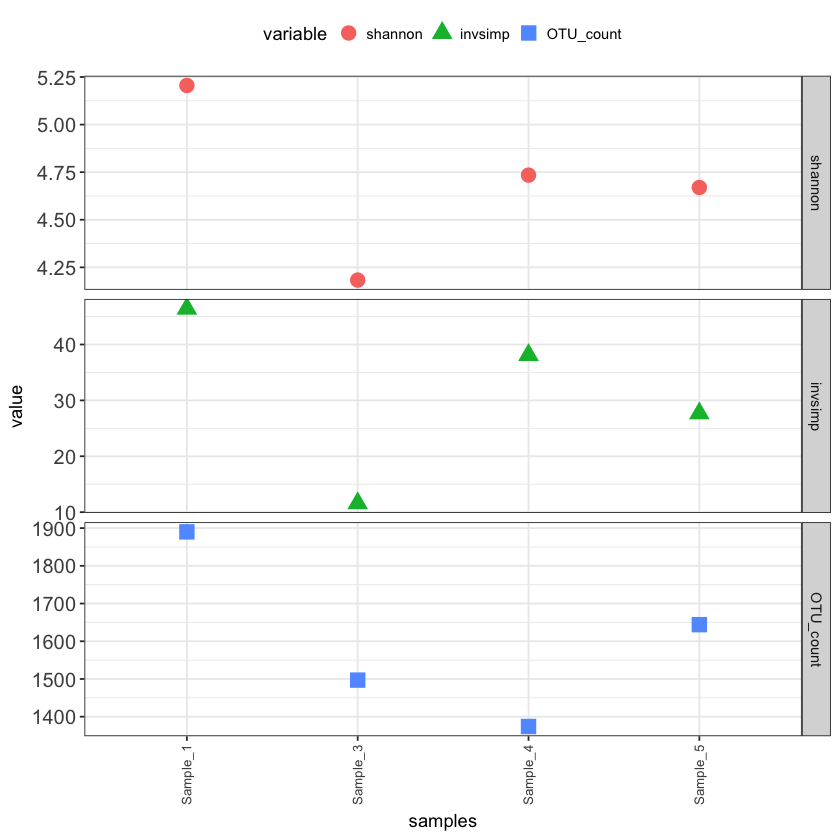

In [12]:
ggplot(alpha.m, aes(x=samples, y=value, fill=variable, shape=variable))+geom_point(size=4, aes(color=variable))+facet_grid(variable~.,scales="free")+theme_bw()+theme(axis.text.x = element_text(angle = 90,hjust=1,vjust=0.5,size=8),axis.text.y=element_text(size=12),legend.position = "top")

## Rarefaction curve
### By subsampling the number of sequences and then counting how many OTUs this generates, the x and y axes, respectively... We can make a rarefaction curve. This is often used to see how 'deeply' you've sequenced. If you keep sequencing your sample (along the x-axis), do you continue seeing new OTUs (y-axis)?

In [27]:
# Use the subsampled data
head(subsampled[1:3,])

,Sample_1,Sample_2,Sample_3,Sample_4,OTU.ID
KF130109.1.1755_U,0,5,1,19,KF130109.1.1755_U
AB284159.1.1765_U,0,8,3,15,AB284159.1.1765_U
AY256316.1.1219_U,0,0,0,1,AY256316.1.1219_U


In [28]:
tmp<-subsampled[1:4] #select only numerics
curve_in<-as.data.frame(t(tmp)) # transpose

In [29]:
# graph parameters:
colors<-c("red", "orange", "lightblue", "darkgreen")
linetype<-c("dotted", "solid", "solid", "dotted")

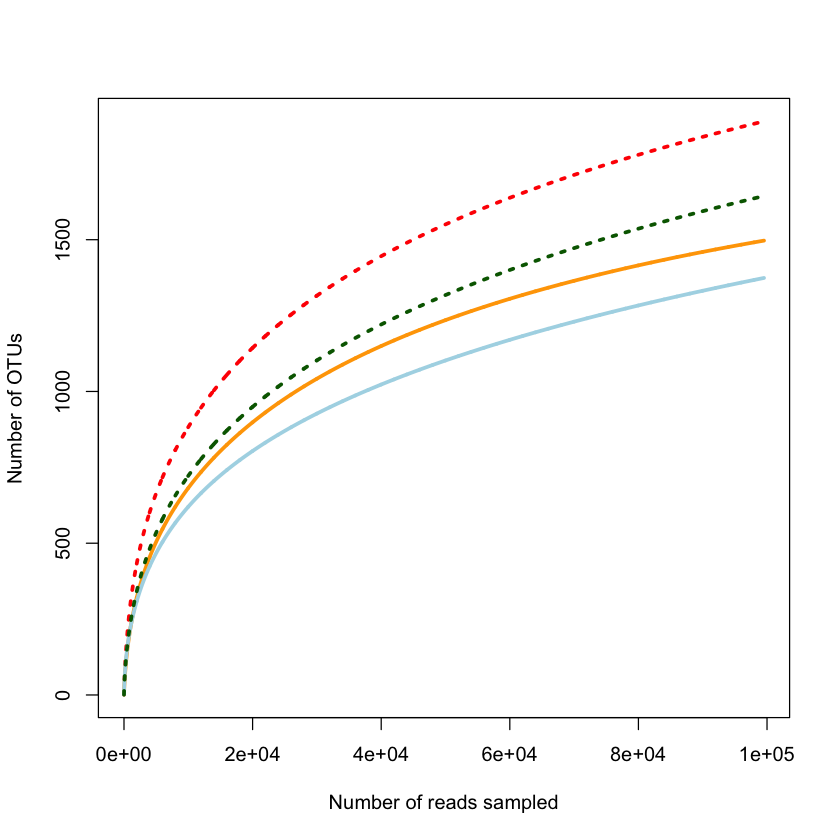

In [20]:
rarefac<-rarecurve(curve_in, step=20, lwd=3, col=colors, lty=linetype, label=F, xlab="Number of reads sampled", ylab="Number of OTUs")

## Community composition plot
### Specific to 18S tag-sequencing work to evaluate microbial eukaryotic diversity, but can be adapted to other

In [35]:
#head(count.no1) #original data, has OTU and taxonomy information
#head(subsampled) #subsampled data for analysis
key<-count.no1[c(1,6)] #OTU ID to taxonomy key
subsampled$OTU.ID<-row.names(subsampled)
head(key)

,OTU.ID,taxonomy
KF130109.1.1755_U,KF130109.1.1755_U,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
AB284159.1.1765_U,AB284159.1.1765_U,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
AY256316.1.1219_U,AY256316.1.1219_U,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.
EU087259.1.908_U,EU087259.1.908_U,Eukaryota; Rhizaria; Cercozoa; Filosa-Thecofilosea; Ebriida; TAGIRI1-lineage; TAGIRI1-lineage_X; TAGIRI1-lineage_X+sp.
EF173005.1.1679_U,EF173005.1.1679_U,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-22; Dino-Group-II-Clade-22_X; Dino-Group-II-Clade-22_X+sp.
GU820024.1.1392_U,GU820024.1.1392_U,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Dinophyceae_XXX; Dinophyceae_XXX+sp.


In [36]:
#Get taxonomic information (by OTU.ID) back on subsampled data
count.subsampled<-join(subsampled, count.no1[c(1,6)], by="OTU.ID", type="left", match="first")
head(count.subsampled[1:3,]); dim(count.subsampled)

,OTU.ID,Sample_1,Sample_3,Sample_4,Sample_5,taxonomy
KF130109.1.1755_U,KF130109.1.1755_U,0,2,18,1,Eukaryota; Alveolata; Dinophyta; Syndiniales; Dino-Group-II; Dino-Group-II-Clade-14; Dino-Group-II-Clade-14_X; Dino-Group-II-Clade-14_X+sp.
AB284159.1.1765_U,AB284159.1.1765_U,0,4,19,5,Eukaryota; Alveolata; Dinophyta; Dinophyceae; Dinophyceae_X; Dinophyceae_XX; Protoperidinium; Protoperidinium+bipes
AY256316.1.1219_U,AY256316.1.1219_U,0,1,1,0,Eukaryota; Stramenopiles; Ochrophyta; Bacillariophyta; Bacillariophyta_X; Raphid-pennate; Raphid-pennate_X; Raphid-pennate_X+sp.


[1] 3505    6

## Parse by taxonomy column

In [37]:
#This is specific to the PR2 database. 
#Depending on your scientific question, you will need to review the taxonomic grouping
#Function, makes a simplifed "Taxa" column based on PR2 output

pr2_rename_taxa<-function(df){
  library(reshape2)
  split<-colsplit(df$taxonomy, "; ", c("Level1","Level2","Level3","Level4","Level5","Level6", "Level7","Level8","Level9", "Level10", "Level11", "Level12"))
  split[ is.na(split) ] = "XXX"
  split[ split == "" ] = "XXX"
  split$Taxa<-"Other/unknown"
  split$Taxa[split$Level1 == "No blast hit"]="No blast hit"
  split$Taxa[split$Level1 == "Unassigned"]="Unassigned"
  split$Taxa[split$Level1 == "None"]="None"
  split$Taxa[split$Level2=="Amoebozoa"]="Amoebozoa"
  split$Taxa[split$Level2=="Apusozoa"]="Other/unknown"
  split$Taxa[split$Level2=="Eukaryota_X"]="Other/unknown"
  split$Taxa[split$Level2=="Eukaryota_Mikro"]="Other/unknown"
  split$Taxa[split$Level2=="Stramenopiles"]="Stramenopiles-Other"
  split$Taxa[split$Level2=="Alveolata"]="Alveolates-Other"
  split$Taxa[split$Level2=="Opisthokonta"]="Opisthokonts-Other"
  split$Taxa[split$Level2=="Archaeplastida"]="Archaeplastids-Other"
  split$Taxa[split$Level2=="Excavata"]="Excavates"
  split$Taxa[split$Level2=="Rhizaria"]="Rhizaria-Other"
  split$Taxa[split$Level2=="Hacrobia"]="Other/unknown"
  split$Taxa[split$Level3=="Haptophyta"]="Haptophytes"
  split$Taxa[split$Level3=="Fungi"]="Opisthokont-Fungi"
  split$Taxa[split$Level3=="Metazoa"]="Opisthokont-Metazoa"
  split$Taxa[split$Level3=="Foraminifera"]="Rhizaria-Foraminifera"
  split$Taxa[split$Level3=="Dinophyta"]="Alveolates-Dinoflagellates"
  split$Taxa[split$Level4=="Syndiniales"]="Alveolates-Syndiniales"
  split$Taxa[split$Level3=="Cryptophyta"]="Cryptophytes"
  split$Taxa[split$Level3=="Ciliophora"]="Alveolates-Ciliates"
  split$Taxa[split$Level3=="Chlorophyta"]="Archaeplastids-Chlorophytes"
  split$Taxa[split$Level3=="Cercozoa"]="Rhizaria-Cercozoa"
  split$Taxa[split$Level4=="Acantharea"]="Rhizaria-Acantharia"
  split$Taxa[split$Level4=="Chrysophyceae-Synurophyceae"]="Stramenopiles-Chrysophytes"
  split$Taxa[split$Level4=="Pelagophyceae"]="Stramenopiles-Pelagophytes"
  split$Taxa[split$Level4=="Bacillariophyta"]="Stramenopiles-Diatoms"
  split$Taxa[split$Level4=="MAST"]="Stramenopiles-MAST"
  split$Taxa[split$Level4=="Polycystinea"]="Rhizaria-Polycystines"
  split$Taxa[split$Level4=="RAD-C"]="Rhizaria-RAD (A,B,C)"
  split$Taxa[split$Level4=="RAD-B"]="Rhizaria-RAD (A,B,C)"
  split$Taxa[split$Level4=="RAD-A"]="Rhizaria-RAD (A,B,C)"
  return(split)
} 
newtax<-pr2_rename_taxa(count.subsampled)
unique(newtax$Taxa) #Simplified taxonomic group naming schematic
data_binned<-data.frame(count.subsampled, newtax) 

[1] "Alveolates-Syndiniales"      "Alveolates-Dinoflagellates" 
 [3] "Stramenopiles-Diatoms"       "Rhizaria-Cercozoa"          
 [5] "Haptophytes"                 "Stramenopiles-MAST"         
 [7] "Cryptophytes"                "Alveolates-Ciliates"        
 [9] "Rhizaria-RAD (A,B,C)"        "Rhizaria-Polycystines"      
[11] "Opisthokonts-Other"          "Opisthokont-Fungi"          
[13] "Rhizaria-Acantharia"         "Stramenopiles-Other"        
[15] "Archaeplastids-Other"        "Archaeplastids-Chlorophytes"
[17] "Stramenopiles-Pelagophytes"  "Stramenopiles-Chrysophytes" 
[19] "Opisthokont-Metazoa"         "Excavates"                  
[21] "Other/unknown"               "Amoebozoa"                  
[23] "Alveolates-Other"            "Rhizaria-Other"             
[25] "Rhizaria-Foraminifera"

In [38]:
data.m<-melt(data_binned) #melt
#head(data.m)
data.agg<-aggregate(data.m$value, by=list(Taxa=data.m$Taxa,Samples=data.m$variable),sum) #sum sequences by taxonomic group
# save(data.agg, data.m, data_binned, file="Checkpoint2_PrelimFigs.Rdata")

Using OTU.ID, taxonomy, Level1, Level2, Level3, Level4, Level5, Level6, Level7, Level8, Level9, Level10, Level11, Level12, Taxa as id variables


## Set up to plot taxonomic groups

In [39]:
tax_order=c("Alveolates-Ciliates","Alveolates-Dinoflagellates","Alveolates-Syndiniales","Alveolates-Other","Archaeplastids-Chlorophytes","Archaeplastids-Other","Cryptophytes","Excavates","Haptophytes","Rhizaria-Acantharia","Rhizaria-Cercozoa","Rhizaria-Polycystines","Rhizaria-RAD (A,B,C)","Stramenopiles-Diatoms","Stramenopiles-Pelagophytes","Stramenopiles-MAST","Stramenopiles-Chrysophytes","Stramenopiles-Other","Opisthokont-Fungi","Opisthokont-Metazoa","Opisthokonts-Other","Other/unknown","Unassigned")
tax_color=c("#800026","#cb181d","#e7298a","#df65b0","#fc4e2a","#fd8d3c","#fed976","#c7e9b4","#7fcdbb","#41ae76","#238b45","#006d2c","#00441b","#c6dbef","#6baed6","#1d91c0","#225ea8","#253494","#081d58","#54278f","#8c510a","#bf812d","#dfc27d")
names(tax_color)<-tax_order
data.agg$tax<-factor(data.agg$Taxa, levels=rev(tax_order)) #factoring
head(data.agg)

Taxa,Samples,x,tax
Alveolates-Ciliates,Sample_1,29164,Alveolates-Ciliates
Alveolates-Dinoflagellates,Sample_1,13524,Alveolates-Dinoflagellates
Alveolates-Other,Sample_1,135,Alveolates-Other
Alveolates-Syndiniales,Sample_1,7302,Alveolates-Syndiniales
Amoebozoa,Sample_1,0,NA
Archaeplastids-Chlorophytes,Sample_1,325,Archaeplastids-Chlorophytes


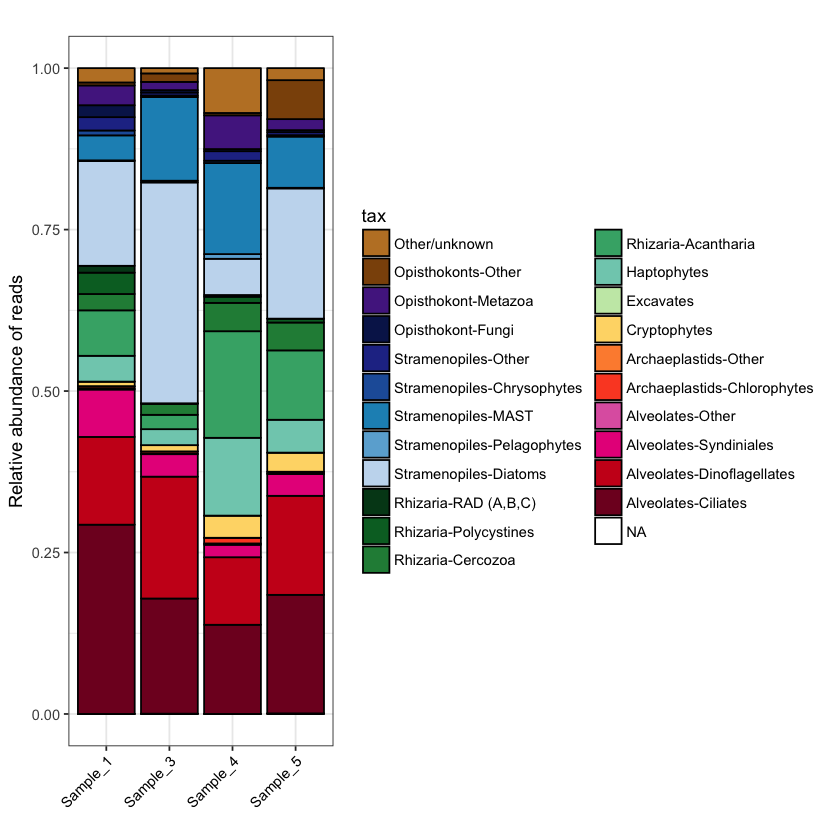

In [40]:
#Bar plot of community composition
ggplot(data.agg[order(data.agg$tax),], aes(y=x,fill=tax,x=Samples))+
    geom_bar(position = "fill", stat = "identity", color="black",aes(fill=tax))+
    scale_fill_manual(values=tax_color)+
    labs(title="", x="",y="Relative abundance of reads")+
    theme_bw()+
    theme(legend.position="right",axis.text.x = element_text(angle=45, hjust=1,vjust=1,color="black"))

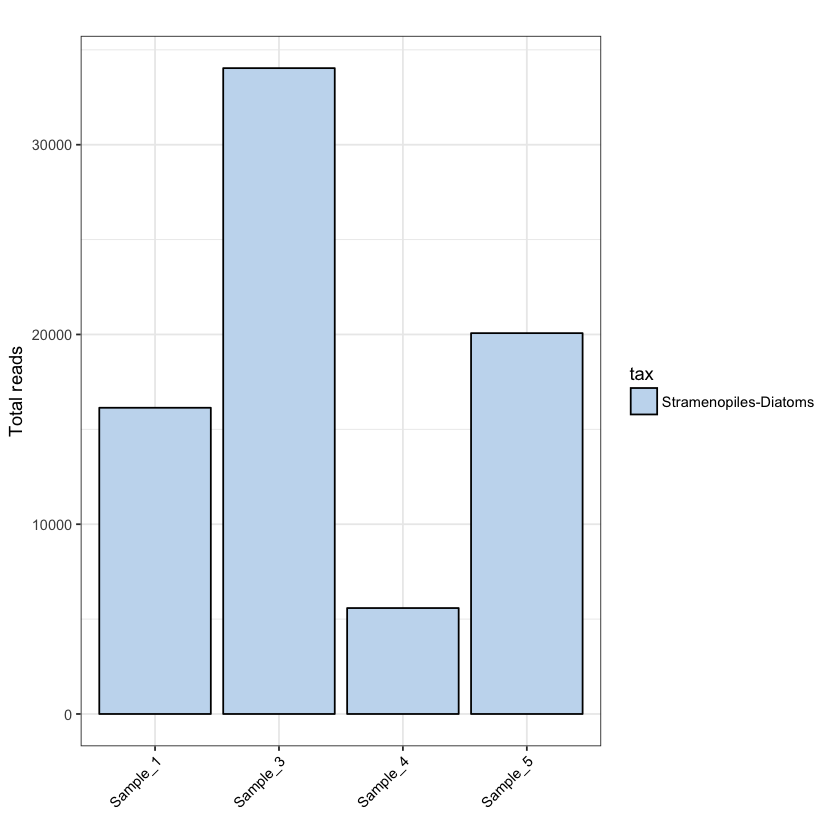

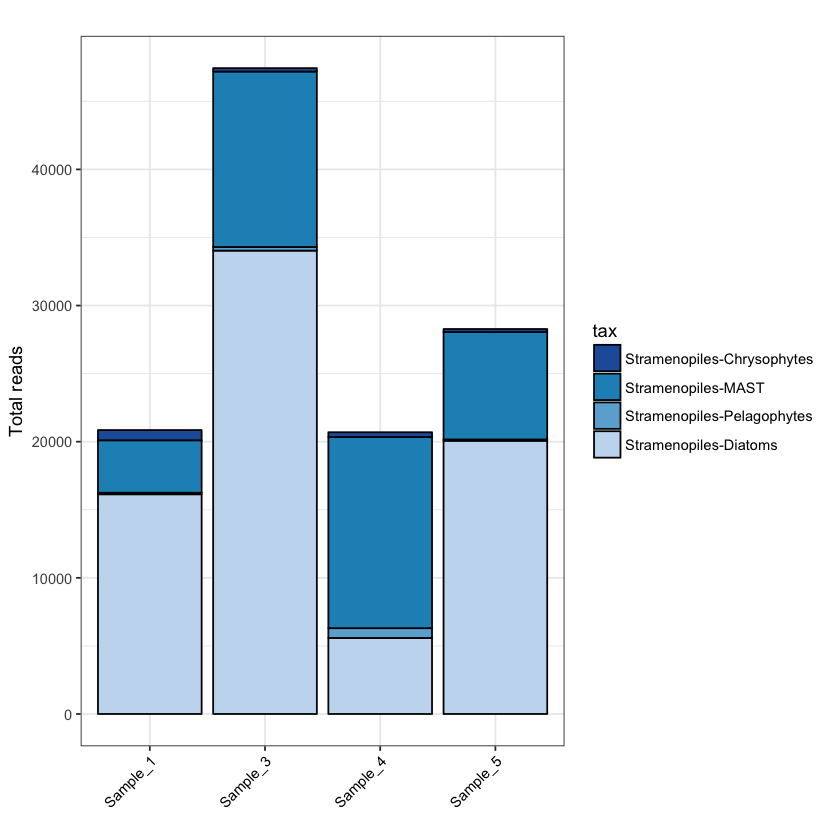

In [41]:
# We can plot this again, but look at total abundance of only diatoms
# Changed position="stack" and set plot equal to "barplot"
barplot<-ggplot(data.agg[order(data.agg$tax),], aes(y=x,fill=tax,x=Samples))+
    geom_bar(position = "stack", stat = "identity", color="black",aes(fill=tax))+
    scale_fill_manual(values=tax_color)+
    labs(title="", x="",y="Total reads")+
    theme_bw()+
    theme(legend.position="right",axis.text.x = element_text(angle=45, hjust=1,vjust=1,color="black"))
# select only diatoms to plot:
barplot %+% subset(data.agg, tax %in% "Stramenopiles-Diatoms")
# Repeate but with all stramenopiles:
stram<-c("Stramenopiles-Diatoms", "Stramenopiles-MAST","Stramenopiles-Pelagophytes", "Stramenopiles-Chrysophytes")
barplot %+% subset(data.agg, tax %in% stram)

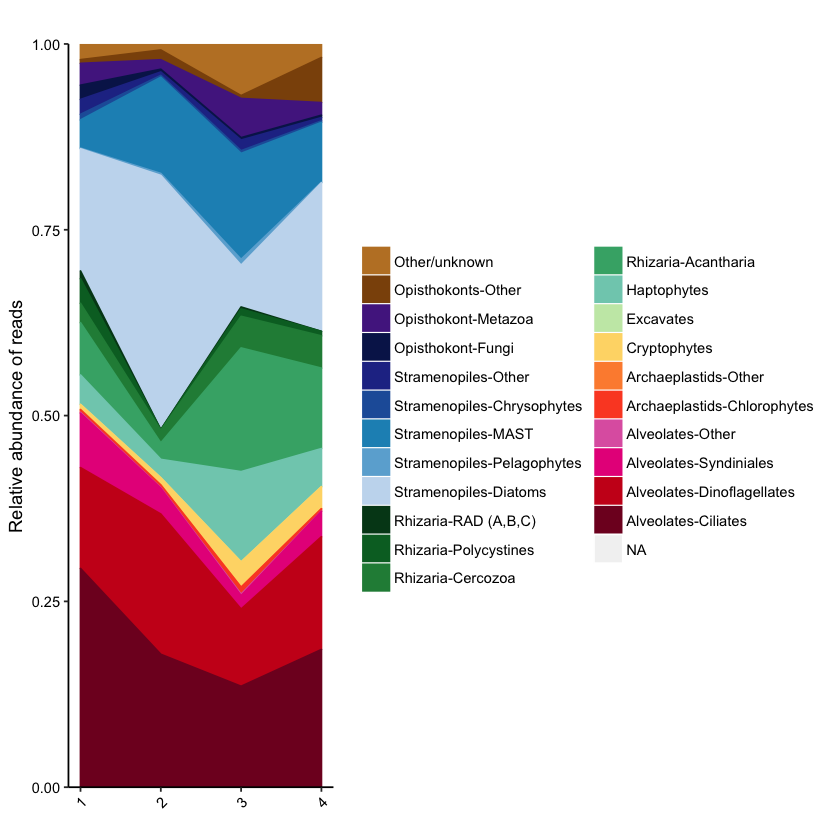

In [34]:
# Area plot
# make sure to use "as.numeric" for the x-axis
# note that the x-axis automatically changes to 1-4. 
# Ideally, re-label ahead of ploting
plot_area_sub<-ggplot(data.agg[order(data.agg$tax),], aes(y=x,fill=tax,order=tax))+ 
  geom_area(aes(fill= tax,x=as.numeric(Samples), color=tax), position = "fill", stat = "identity")+
  scale_color_manual(values=tax_color)+
  scale_fill_manual(values=tax_color)+
  labs(title="", x="",y="Relative abundance of reads")+
  theme(legend.position="right",legend.title = element_blank(),plot.title=element_text(hjust = 0,face='bold',size=20))+
  theme(panel.grid.minor = element_blank(),panel.background = element_blank(),strip.background = element_blank(), axis.text.x = element_text(angle=45,hjust = 1,vjust = 1, color = "black"), axis.text.y=element_text(color="black"))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank())+
  theme(panel.border = element_blank(), axis.line = element_line())+
  scale_y_continuous(expand = c(0, 0)) 
plot_area_sub

## beta diversity analysis

In [42]:
# use subsampled data
head(subsampled[1:2,])
num_only<-subsampled[1:4] # select numerics only

,Sample_1,Sample_3,Sample_4,Sample_5,OTU.ID
KF130109.1.1755_U,0,2,18,1,KF130109.1.1755_U
AB284159.1.1765_U,0,4,19,5,AB284159.1.1765_U


In [79]:
# Again (since re removed Sample 2) remove whole rows that equal zero
rowsum<-apply(num_only,1,sum)
num_only_no0 = num_only[ rowsum>0, ]
dim(num_only_no0)

[1] 3028    4

In [113]:
# Normalize by calculating relative abundance
#tmp<-num_only_no0[1:200,] # take the top 200 OTUs (to reduce run time of NMDS for this tutorial)
relabun <- decostand(num_only_no0, MARGIN=2, method = "total")
colSums(relabun) # check! should all equal 1.
t.relabun<-t(relabun) # transform

Sample_1 Sample_3 Sample_4 Sample_5 
       1        1        1        1

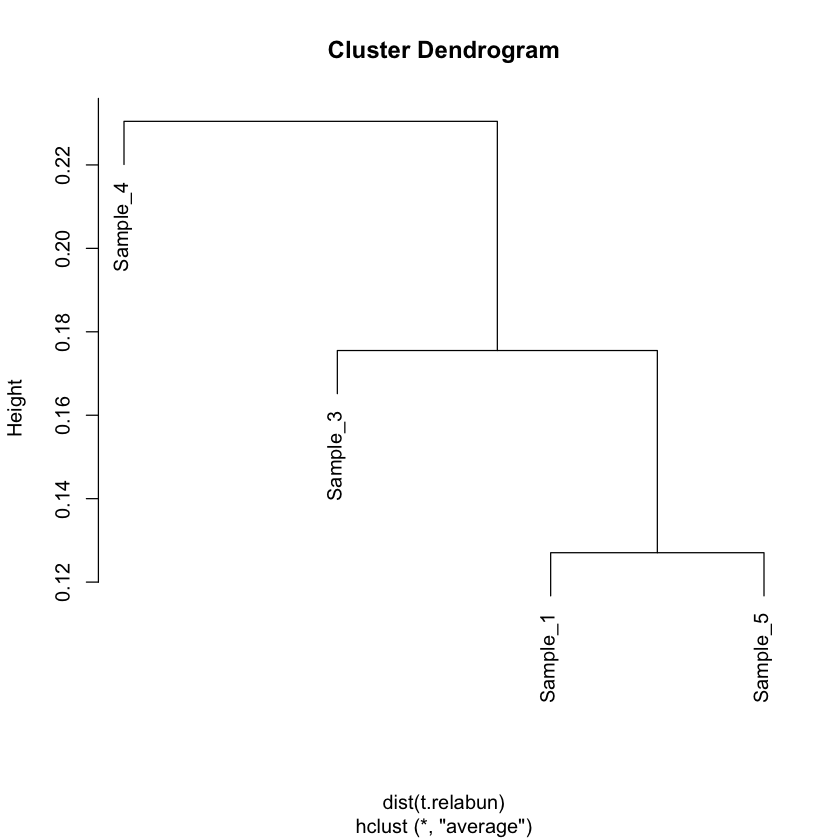

In [117]:
# Cluster dendrogram:
cluster<-hclust(dist(t.relabun), method="average")
plot(cluster)

In [115]:
# Calculate MDS with Bray-Curtis dissimilarity matrix
NMDS=metaMDS(t.relabun,distance="bray",k=2)
# Because this is trial data, an error will be reported. This should not happen with larger datasets
#head(NMDS$points)
#head(NMDS$stress)
#stressplot(NMDS)
# Note that this approach will generate positions of samples (communities) in a multidimensional space using a reduced number of dimensions (2) for visualization purposes.

Run 0 stress 0 
Run 1 stress 9.68555e-05 
... Procrustes: rmse 0.3049859  max resid 0.360453 
Run 2 stress 0 
... Procrustes: rmse 0.3118175  max resid 0.4883466 
Run 3 stress 0 
... Procrustes: rmse 0.193417  max resid 0.305673 
Run 4 stress 0 
... Procrustes: rmse 0.1156312  max resid 0.1922395 
Run 5 stress 0 
... Procrustes: rmse 0.1153046  max resid 0.15197 
Run 6 stress 0 
... Procrustes: rmse 0.1798805  max resid 0.2433283 
Run 7 stress 0 
... Procrustes: rmse 0.1126876  max resid 0.1531237 
Run 8 stress 0 
... Procrustes: rmse 0.06191172  max resid 0.09329534 
Run 9 stress 0 
... Procrustes: rmse 0.1674335  max resid 0.2268056 
Run 10 stress 0 
... Procrustes: rmse 0.05653223  max resid 0.07886368 
Run 11 stress 0 
... Procrustes: rmse 0.208667  max resid 0.2804834 
Run 12 stress 0 
... Procrustes: rmse 0.1752  max resid 0.2558756 
Run 13 stress 0 
... Procrustes: rmse 0.277302  max resid 0.4270194 
Run 14 stress 0 
... Procrustes: rmse 0.0871204  max resid 0.107854 
Run 15 str

Warning message in metaMDS(t.relabun, distance = "bray", k = 2):
“Stress is (nearly) zero - you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”

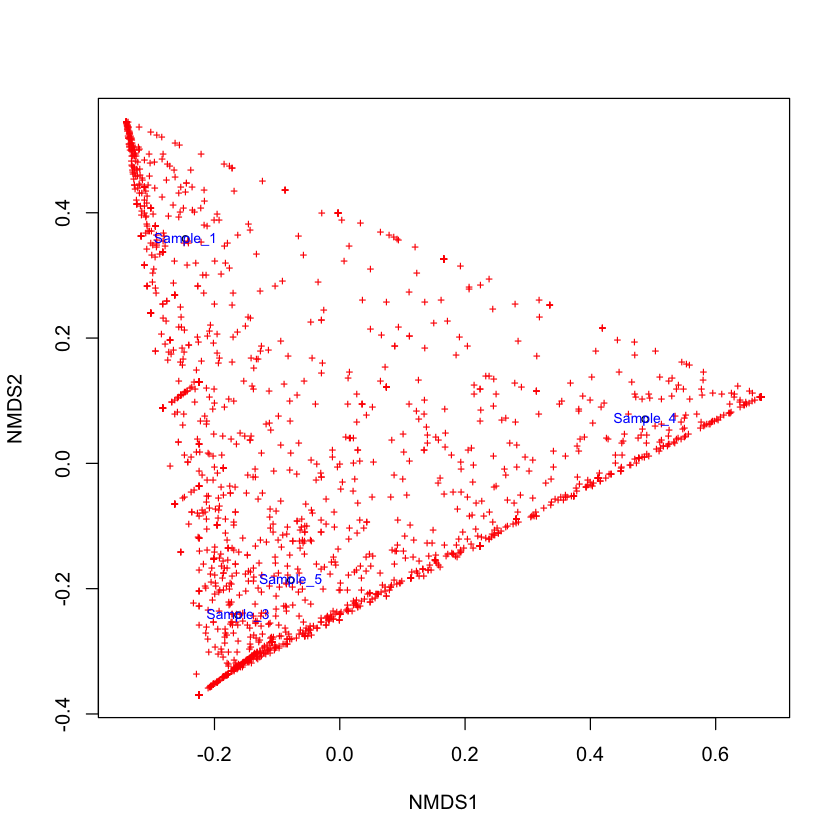

In [95]:
# Basic option to plot:
plot(NMDS)
orditorp(NMDS,display="sites",col="blue") #label samples
#black circles are the OTUs

In [116]:
# Alternatively, you can extract the points for each sample and plot using ggplot2
NMDS_pts <- NMDS$points[1:nrow(NMDS$points),]
NMDS_pts<-as.data.frame(NMDS_pts)
NMDS_pts$Sample<-row.names(NMDS_pts)
# head(NMDS_pts)

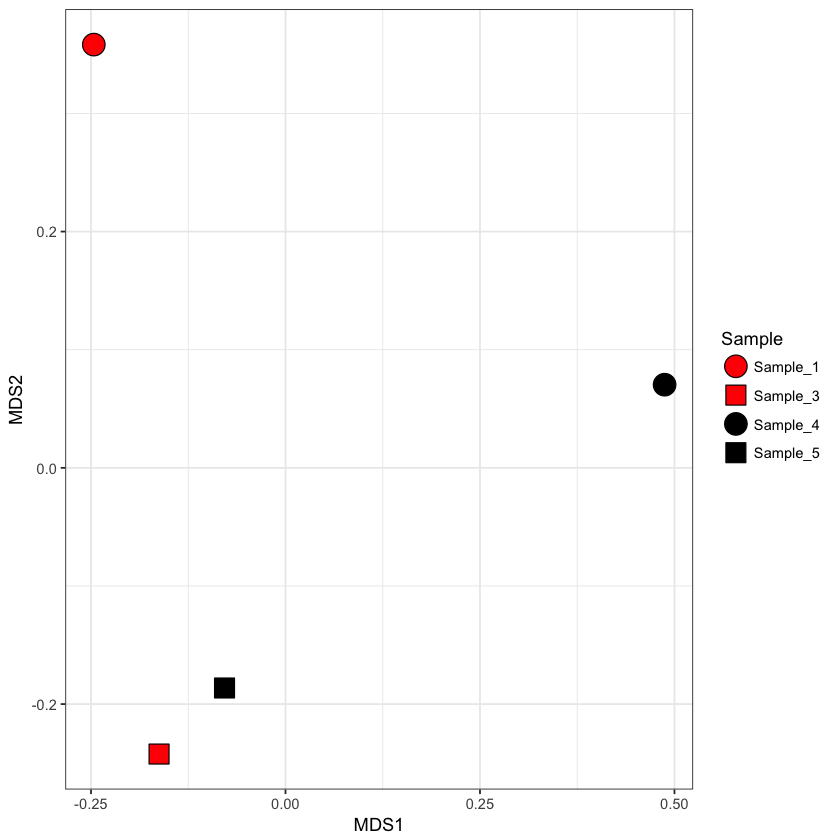

In [112]:
NMDS_plot <- ggplot(NMDS_pts, aes(x = MDS1, y = MDS2, shape=Sample, fill=Sample), color="black") + 
    geom_point(size=6,aes(fill=Sample)) + 
    theme_bw() +
    scale_shape_manual(values = c(21,22,21,22))+scale_fill_manual(values=c("red","red", "black", "black"))
NMDS_plot

# Last updated 06-25-2018 Sarah K. Hu